### **Classification of Tamil Characters using Convolutional Neural Networks**

## **Dataset**

The dataset consists of 3000 images of Tamil Characters from  அ to ஓ . Each letter consists of approx. 300 images. Each of images are of different shapes. Dataset can be downloaded from [https://drive.google.com/file/d/1fnfdaAAQA-v1l7USrpJAKSWzx3fD0ln8/view?usp=sharing](https://drive.google.com/file/d/1fnfdaAAQA-v1l7USrpJAKSWzx3fD0ln8/view?usp=sharing)

## **Data Preprocessing**

1. Extracting images from the dataset and resizing it to shape 224,224. 
2. Binarizing the image using opencv-python

```python
#please change directories according to your file system
import cv2 
import os
for files in  os.listdir("./dataset"):
    print(files)
    img=cv2.imread('./dataset/'+str(files),0)
    img2=255-img
    img2=cv2.resize(img2, (224, 224)) 
```

## **Data Classification**

Classification of images into seperate class folders

```python
#please change directories according to your file system
import re
for files in  os.listdir("./processed_dataset"):
    index1=re.findall(r'\d\dt',files)
    index=int(index1[0][0:2])
    img=cv2.imread('./processed_dataset/'+str(files),0)
    print(index)
    if not os.path.exists('./classified_dataset/'+str(index)+'/'):
        os.makedirs('./classified_dataset/'+str(index)+'/')
    cv2.imwrite('./classified_dataset/'+str(index)+'/'+files,img)
    ```

## **Character Classification**

### Importing necessary packages

In [1]:
import os
import cv2
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### **Generating image files from folders**

Extract images from Files and append into images and coressponding classes into labels

In [2]:
images=[]
labels=[]
for folders in os.listdir('../input/tamilcharacterdataset/classified_dataset/classified_dataset'):
    for files in os.listdir('../input/tamilcharacterdataset/classified_dataset/classified_dataset/'+folders):
        img=cv2.imread('../input/tamilcharacterdataset/classified_dataset/classified_dataset/'+folders+'/'+files,0)/255
        img=cv2.resize(img,(128,128))
        img.shape=(128,128,1)
        images.append(img)
        labels.append(folders)
images=np.array(images)
labels=np.array(labels)        

### **Defining the model**

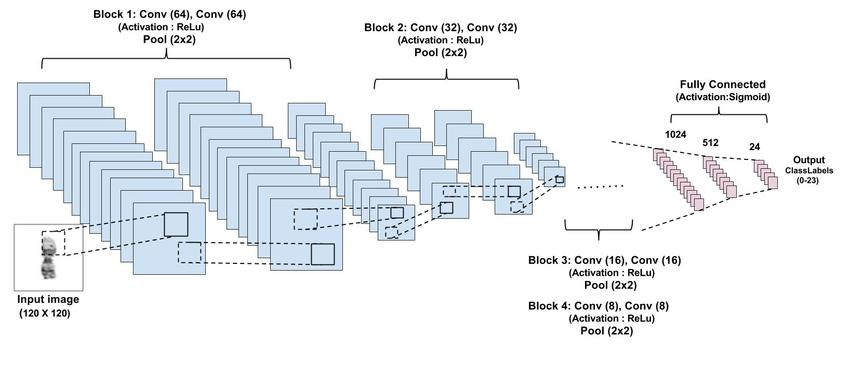

In [3]:
from IPython.display import Image
Image("../input/cnnimage/CNN-architecture-used-for-classification.png")

In [4]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(128,128,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 64)      1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
__________

#### Converting 11 classes into one-hot encoding

In [5]:
y_labels=to_categorical(labels)

### **Training** 
1.Spliting the data for training and validation 
2.Fitting the model and evaluating it

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
keras.initializers.lecun_uniform(seed=None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(X_train, y_train, batch_size=320),
 #                   steps_per_epoch=len(X_train) / 32, epochs=20)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(images, y_labels, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 2009 samples, validate on 990 samples
Epoch 1/50
2009/2009 [==============================] - 8s 4ms/step - loss: 1.8963 - acc: 0.3280 - val_loss: 1.1168 - val_acc: 0.6828
Epoch 2/50
2009/2009 [==============================] - 3s 2ms/step - loss: 0.8751 - acc: 0.7058 - val_loss: 0.6872 - val_acc: 0.7808
Epoch 3/50
2009/2009 [==============================] - 3s 2ms/step - loss: 0.5604 - acc: 0.8069 - val_loss: 0.4684 - val_acc: 0.8535
Epoch 4/50
2009/2009 [==============================] - 3s 2ms/step - loss: 0.4406 - acc: 0.8487 - val_loss: 0.3680 - val_acc: 0.8879
Epoch 5/50
2009/2009 [==============================] - 3s 2ms/step - loss: 0.3443 - acc: 0.8820 - val_loss: 0.2829 - val_acc: 0.9182
Epoch 6/50
2009/2009 [==============================] - 3s 2ms/step - loss: 0.2495 - acc: 0.9079 - val_loss: 0.3245 - val_acc: 0.8970
Epoch 7/50
2009/2009 [==============================] - 3s 2ms/step - loss: 0.2092 - acc: 0.9268 - val_loss: 0.2537 - val_acc: 0.9172
Epoch 8/50
2009

### **Predicting Classes**

In [7]:
model.predict(images[1233:1234])

array([[1.7481707e-05, 7.1572726e-09, 9.9998248e-01, 6.1573530e-16,
        9.6119689e-16, 4.1665122e-16, 2.7085033e-16, 1.5983280e-14,
        1.8280891e-11, 1.6929495e-10, 2.5556268e-10]], dtype=float32)

In [8]:
from IPython.display import Image
Image(images[1233])

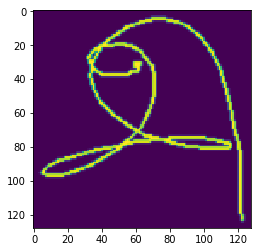

In [9]:
from matplotlib import pyplot as plt
img=images[1233]
img.shape=(128,128)
plt.imshow(img)

In [10]:
model.predict_classes(images[1233:1234])

array([2])